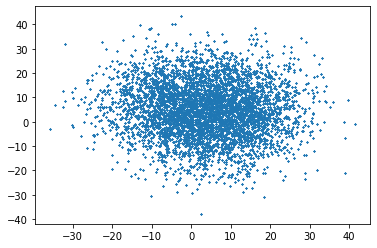

In [ ]:
###
# Proceso generador de datos....# probar que tan buenos 
# en escenarios fácticos..
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
X,y = make_blobs(n_samples = 5000, n_features=2, centers=3, cluster_std=10, shuffle=True, random_state=1213)
plt.scatter(X[:,0], X[:,1], s=2, marker='x')

In [ ]:
X

array([[ 8.26035181,  8.87863187],
       [-4.05203168,  8.18715296],
       [ 8.93857039,  7.5575433 ],
       ...,
       [ 4.45806174, -3.96992039],
       [-2.95073343,  6.17546979],
       [ 6.63345786, -2.29706082]])

# Description about 
n_clusters = 3, the number of centroids
n_init the number of times that run the algorithm
remember with different random centroids with the objective of
minimize SSE.
# max iter---the number of maximun iterations
in each only ejecution..




## A problem in K-means is one centroid could be let empty...
this is soluted with C-fuzzy means..

this is stopped if reach the convergence before of reach the number
of maximun iterations..


564700.066628081


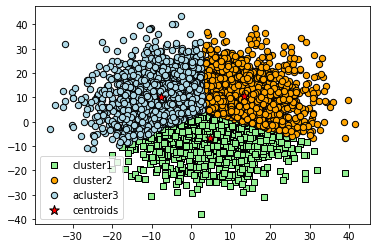

In [ ]:
km = KMeans(n_clusters =3, init='k-means++', n_init=4, max_iter=100, tol = 1e-04, random_state=123)
y_km = km.fit_predict(X)  
plt.scatter(X[y_km==0,0], X[y_km==0,1], s=40, c='lightgreen', marker='s', edgecolors='black', label = 'cluster1')
plt.scatter(X[y_km==1,0], X[y_km==1,1], s=40, c='orange', marker='o', edgecolor='black', label='cluster2')
plt.scatter(X[y_km==2,0], X[y_km==2,1], s=40, c='lightblue', marker='o', edgecolor='black', label='acluster3')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], s=100, marker='*', c='red', edgecolor='black', label='centroids')
plt.legend(scatterpoints=1)
print(km.inertia_)

In [ ]:
# K-means ++
#How initialize the centroids...
## initialize with init='k-means++'

In [ ]:
# Elbow method...
# We can uses SSE to measure 
# we can get SSE with km.inertia_

In [ ]:
km.inertia_

1996.1950191517813

In [ ]:
## How we can choose k.
# if K increase the distortion reduced
# due centroids are nearest of points..
# the insight behind elbow method  is that choose the value of K where distortion increase more fast

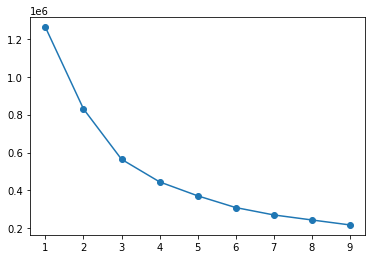

In [ ]:
distortions = []
for i in range(1,10):
  km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
  km.fit(X)
  distortions.append(km.inertia_)
plt.plot(range(1,10), distortions, marker='o')

In [ ]:
## Calidad del agrupamiento....
# una representación gŕafica de como están agrupadas las muestras en los grupos...
# Cohesión del grupo a(i)  la distancia media entre una muestra y el restante de muestras en el mismo grupo
# separación del grupo b(i) a partir del grupo  mas cercano como la distancia entre una muestra 
# y todas las muestras del grupo mas cercano.


In [ ]:
km = KMeans(n_clusters=4, init='k-means++', n_init=10, max_iter=300)
y_km = km.fit_predict(X)

0.3355469398881165


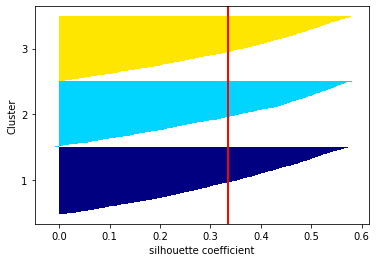

In [ ]:
import numpy as np
from matplotlib import cm 
from sklearn.metrics import silhouette_samples
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X,y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0,0
yticks = []
for i,c in enumerate(cluster_labels):
  c_silhouette_vals = silhouette_vals[y_km==c]
  c_silhouette_vals.sort()
  y_ax_upper += len(c_silhouette_vals)
  color = cm.jet(float(i)/n_clusters)
  plt.barh(range(y_ax_lower, y_ax_upper),c_silhouette_vals, height=1.0, edgecolor='none', color = color)
  yticks.append((y_ax_lower + y_ax_upper)/2.)
  y_ax_lower += len(c_silhouette_vals)
  silhouette_avg = np.mean(silhouette_vals)
  plt.axvline(silhouette_avg, color='red')
  plt.yticks(yticks, cluster_labels+1)
  plt.ylabel('Cluster')
  plt.xlabel('silhouette coefficient')
print(silhouette_avg)

In [ ]:
# Hierarchical clustering 
# Advantage no is neccesary define k apriori ....

#Example using complete linkage...
##### remeber algorithm --->
# Calculate the distance matrix..
# combine the two groups more closest in more inequality distances
# update matrix
# repeat until there are one cluster

In [ ]:
import pandas as pd
import numpy as np
vars = ['income', 'consumption', 'visits']
labels = ['one', 'two', 'three', 'four', 'five']
X = np.random.random_sample([5,3])*10
df = pd.DataFrame(X, columns=vars)

In [ ]:
df

,income,consumption,visits
0,4.802721,2.647316,4.864392
1,6.927030,9.706768,0.642185
2,2.053695,2.219833,3.383947
3,3.213460,5.567638,5.825608
4,0.138392,3.398233,2.326561


In [ ]:
from scipy.spatial.distance import pdist, squareform 
row_dist = pd.DataFrame(squareform(pdist(df, metric='euclidean')),columns=labels, index=labels)

In [ ]:
row_dist

,one,two,three,four,five
one,0.000000,8.495621,3.151445,3.460920,5.362875
two,8.495621,0.000000,9.344562,7.602031,9.419147
three,3.151445,9.344562,0.000000,4.302855,2.484970
four,3.460920,7.602031,4.302855,0.000000,5.138646
five,5.362875,9.419147,2.484970,5.138646,0.000000


In [ ]:
from  scipy.cluster.hierarchy import linkage

In [ ]:
row_clusters = linkage(df.values, method='complete', metric='euclidean')

In [ ]:
pd.DataFrame(row_clusters, columns=['label1', 'label2', 'distance', 'number of items']
             , index=['cluster %d' %(i+1) for i in range(row_clusters.shape[0])])

,label1,label2,distance,number of items
cluster 1,2.0,4.0,2.484970,2.0
cluster 2,0.0,3.0,3.460920,2.0
cluster 3,5.0,6.0,5.362875,4.0
cluster 4,1.0,7.0,9.419147,5.0


Text(0, 0.5, 'l2 norma')

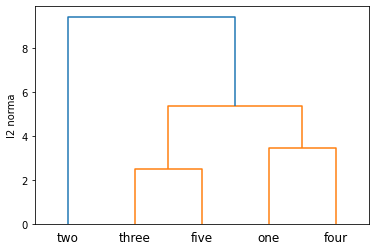

In [ ]:
from scipy.cluster.hierarchy import dendrogram
row_dendr = dendrogram(row_clusters, labels =labels)
plt.ylabel('l2 norma')

*italicized text*

In [ ]:
## Iris fit
!wget "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

--2022-10-18 00:36:41--  https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4551 (4.4K) [application/x-httpd-php]
Saving to: ‘iris.data’

iris.data           100%[===================>]   4.44K  --.-KB/s    in 0s      

2022-10-18 00:36:41 (76.3 MB/s) - ‘iris.data’ saved [4551/4551]



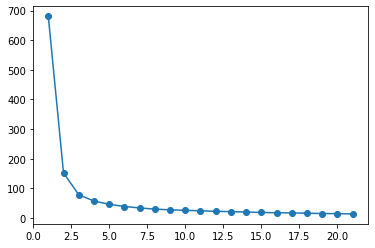

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
pd.options.display.max_rows = None
df = pd.read_csv("iris.data", header=None)
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
estimator = KMeans(n_clusters = 3, init='k-means++', n_init=10, max_iter=300, tol = 1e-04, random_state=0)
predict_labels = estimator.fit_predict(X)
distortions = []
for i in range(1,22):
  km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
  km.fit(X)
  distortions.append(km.inertia_)
plt.plot(range(1,22), distortions, marker='o')
#df['predicted'] = predict_labels

In [ ]:
X  = df.iloc[:,:-1]   # 0  sepalo largo- ancho
y = df.iloc[:,-1]                  # 1

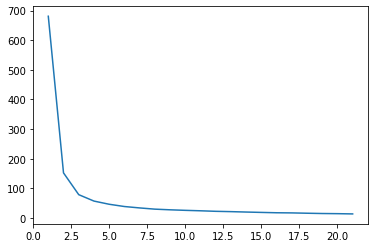

In [ ]:
range_max = 22
distorsions = []
for i in range(1,range_max):
  km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
  km.fit(X)
  distorsions.append(km.inertia_)
plt.plot(range(1, range_max),distorsions)
estimator = KMeans(n_clusters = 3, init='k-means++', n_init=10, max_iter=300, tol = 1e-04, random_state=0)
predict_labels = estimator.fit_predict(X)

In [ ]:
predict_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [ ]:
df['4-hat'] = predict_labels

In [ ]:
df.columns =[str(x) for x in df.columns]
df['4-hat'] = df['4-hat'].astype('str')

In [ ]:
data

NameError: ignored

## DBSCAN


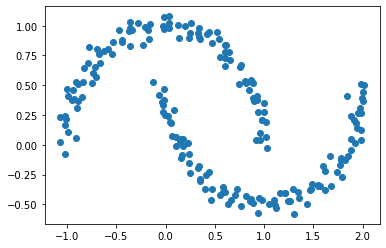

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import AgglomerativeClustering
X,y = make_moons(n_samples =200,noise = 0.05, random_state = 0)
plt.scatter(X[:,0],X[:,1])

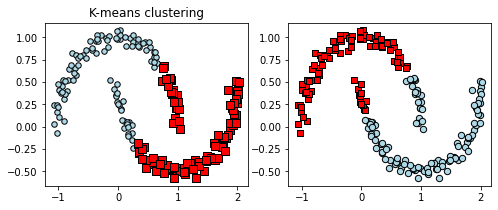

In [ ]:
f,(ax1,ax2) = plt.subplots(1,2, figsize=(8,3))
km = KMeans(n_clusters=2, random_state=0)
yhat = km.fit_predict(X)
ax1.scatter(X[yhat==0,0], X[yhat==0,1], c='lightblue', edgecolor='black', marker='o', s=30, label='cluster1')
ax1.scatter(X[yhat==1,0], X[yhat==1,1], c='red', edgecolor='black', marker='s', s=50, label='cluster2')
ax1.set_title("K-means clustering")
Hierarchical = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete')
yhatA = Hierarchical.fit_predict(X)
ax2.scatter(X[yhatA==0,0], X[yhatA==0,1], c='lightblue', edgecolor='black', marker='o', s=40, label='cluster1')
ax2.scatter(X[yhatA==1,0], X[yhatA==1,1], c='red', edgecolor='black', marker='s', s=40, label='cluster2')
plt.savefig("comparation.eps")

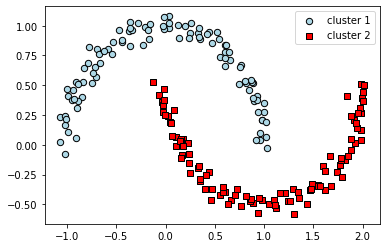

In [ ]:
# DBSCAN algorithm
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.2, min_samples=5, metric='euclidean')
y_db = db.fit_predict(X)
plt.scatter(X[y_db==0,0], X[y_db==0,1], c='lightblue', edgecolor='black', marker='o', s=40, label='cluster 1')
plt.scatter(X[y_db==1,0], X[y_db==1,1], c='red', edgecolor='black', marker='s', s=40,  label='cluster 2')
plt.legend()
plt.savefig("dbs.eps")